In [25]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
data = pd.read_csv('af.csv')
df = pd.DataFrame(data)

# 특성과 타겟 변수 설정
# X = df[['eyeOpen']]
X = df[['e3','e4']]
y = df['state3']

# 레이블 인코딩
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 특징 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Grid Search를 위한 파라미터 그리드 정의
param_grid = {
    'n_estimators': [10, 50, 100, 200],            # 나무의 개수
    'max_features': ['auto', 'sqrt', 'log2'],      # 각 나무에서 고려할 특성의 수
    'max_depth': [None, 10, 20, 30, 40],           # 나무의 최대 깊이
    'min_samples_split': [1, 2, 5, 10],                # 내부 노드를 분할하는 데 필요한 최소 샘플 수
    'min_samples_leaf': [1, 2, 4]                   # 리프 노드에서의 최소 샘플 수
}

# Grid Search 초기화
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1)

# Grid Search 적합
grid_search.fit(X_scaled, y_encoded)

# Grid Search에서 가장 좋은 모델 가져오기
best_model = grid_search.best_estimator_

# 최적의 파라미터와 점수 출력
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# 최적 모델을 사용하여 예측
y_pred = best_model.predict(X_scaled)

# 예측된 레이블을 원래 레이블로 변환
y_pred_labels = le.inverse_transform(y_pred)
y_true_labels = le.inverse_transform(y_encoded)

# 모델 평가
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_true_labels, y_pred_labels))

# # 혼동 행렬 시각화
# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
#             xticklabels=le.classes_, yticklabels=le.classes_)
# plt.xlabel('예측 레이블')
# plt.ylabel('실제 레이블')
# plt.title('혼동 행렬')
# plt.show()


Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
Best Score: 0.6390476190476191
Confusion Matrix:
[[28  8]
 [ 6 30]]

Classification Report:
              precision    recall  f1-score   support

       close       0.82      0.78      0.80        36
        open       0.79      0.83      0.81        36

    accuracy                           0.81        72
   macro avg       0.81      0.81      0.81        72
weighted avg       0.81      0.81      0.81        72



C:\Users\yjw00\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1800 fits failed out of a total of 3600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1042 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\yjw00\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\yjw00\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loca

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# K-means 군집화
kmeans = KMeans(n_clusters=4, random_state=42)
df['kmeans_labels'] = kmeans.fit_predict(df[['Angle_scaled']])

# 군집화 성능 평가
silhouette_avg = silhouette_score(df[['Angle_scaled']], df['kmeans_labels'])
print(f"K-means Silhouette Score: {silhouette_avg:.2f}")


K-means Silhouette Score: 0.56


C:\Users\yjw00\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Hierarchical Clustering Silhouette Score: 0.49


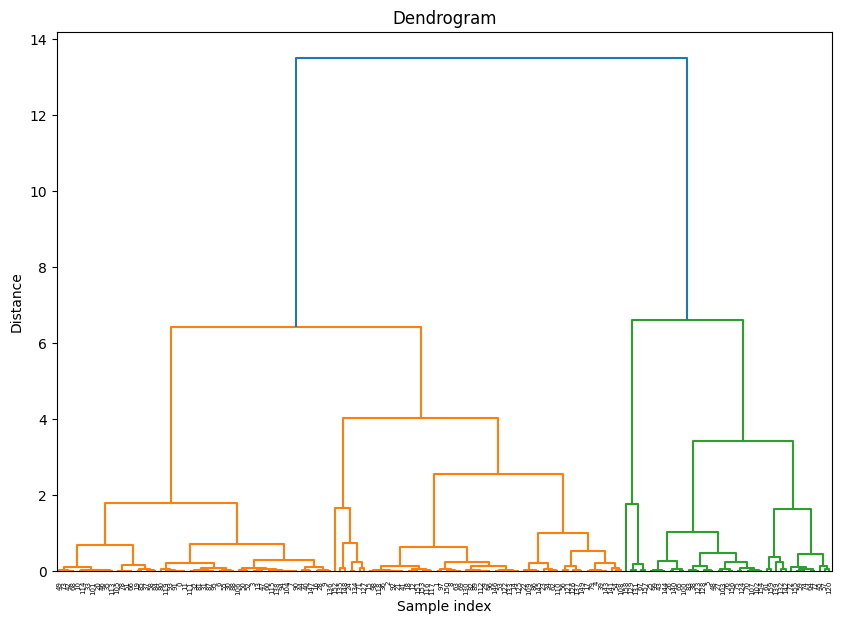

In [13]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt

# 계층적 군집화
linked = linkage(df[['Angle_scaled']], method='ward')
df['hierarchical_labels'] = fcluster(linked, t=4, criterion='maxclust')

# 군집화 성능 평가
silhouette_avg_hc = silhouette_score(df[['Angle_scaled']], df['hierarchical_labels'])
print(f"Hierarchical Clustering Silhouette Score: {silhouette_avg_hc:.2f}")

# 덴드로그램 시각화
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()


In [14]:
from sklearn.cluster import DBSCAN

# DBSCAN 군집화
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['dbscan_labels'] = dbscan.fit_predict(df[['Angle_scaled']])

# 군집화 성능 평가
if len(set(df['dbscan_labels'])) > 1:
    silhouette_avg_dbscan = silhouette_score(df[['Angle_scaled']], df['dbscan_labels'])
    print(f"DBSCAN Silhouette Score: {silhouette_avg_dbscan:.2f}")
else:
    print("DBSCAN did not find more than one cluster.")


DBSCAN Silhouette Score: 0.69


In [15]:
from sklearn.mixture import GaussianMixture

# Gaussian Mixture Model 군집화
gmm = GaussianMixture(n_components=4, random_state=42)
df['gmm_labels'] = gmm.fit_predict(df[['Angle_scaled']])

# 군집화 성능 평가
silhouette_avg_gmm = silhouette_score(df[['Angle_scaled']], df['gmm_labels'])
print(f"GMM Silhouette Score: {silhouette_avg_gmm:.2f}")


GMM Silhouette Score: 0.55


In [16]:
from sklearn.cluster import SpectralClustering

# Spectral Clustering 군집화
spectral = SpectralClustering(n_clusters=4, random_state=42)
df['spectral_labels'] = spectral.fit_predict(df[['Angle_scaled']])

# 군집화 성능 평가
silhouette_avg_spectral = silhouette_score(df[['Angle_scaled']], df['spectral_labels'])
print(f"Spectral Clustering Silhouette Score: {silhouette_avg_spectral:.2f}")


Spectral Clustering Silhouette Score: 0.52


In [17]:
from sklearn.cluster import MeanShift

# Mean Shift 군집화
mean_shift = MeanShift()
df['mean_shift_labels'] = mean_shift.fit_predict(df[['Angle_scaled']])

# 군집화 성능 평가
silhouette_avg_mean_shift = silhouette_score(df[['Angle_scaled']], df['mean_shift_labels'])
print(f"Mean Shift Silhouette Score: {silhouette_avg_mean_shift:.2f}")


Mean Shift Silhouette Score: 0.48
